In [25]:
import pandas as pd

import numpy as np

# problems for Nov 16

# import the data set

data = pd.read_csv("Brapa_cpm.csv")

data = np.array(data)

data.shape

(100, 36)

### Q1: make a new array where the values are converted to log2 cpm


In [26]:
data2 = np.log2(data)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log2
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log2
  """Entry point for launching an IPython kernel.


In [27]:
np.min(data)

-0.432131681

In [28]:
sum(data == 0)

array([26, 29, 23, 25, 27, 24, 27, 28, 26, 26, 26, 26, 26, 25, 26, 28, 30,
       27, 28, 27, 26, 23, 26, 26, 26, 24, 24, 24, 26, 26, 24, 28, 25, 25,
       26, 23])

In [29]:
# Data set has negative numbers and zeroes. Need to adjust for both
data2 = np.log2(data - np.min(data) + 0.000001)
data2

array([[  0.26290953,  -0.40310075,  -0.23202226, ...,  -4.14646913,
         -5.14644355, -19.93156857],
       [  3.99495792,   3.70990132,   3.66301636, ...,   4.27982777,
          4.16607155,   4.01665663],
       [  0.2665089 ,   0.50041072,   0.22147064, ...,   3.08029112,
          2.61892812,   3.11072121],
       ...,
       [  3.79368713,   3.68132562,   3.86629219, ...,   4.0464744 ,
          3.75526413,   4.08196019],
       [  3.73666535,   3.76108546,   3.97229504, ...,   4.76246184,
          5.23221033,   4.98177781],
       [  2.64780606,   0.64752399,   0.92577942, ...,   3.07437482,
          2.55805246,   2.85147923]])

### Q2: Which gene has the highest expression?

In [30]:
data.mean(1).max()

430.28902095555554

In [31]:
data.mean(1) == data.mean(1).max()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False])

In [32]:
data[data.mean(1) == data.mean(1).max()]

array([[581.811147 , 583.8634533, 431.2581622, 462.7393055, 471.8619072,
        469.7565652, 549.513914 , 606.2141607, 565.0840259, 444.6698221,
        446.5692411, 328.7638287, 444.5217237, 418.2273167, 392.2905498,
        318.4005983, 392.4310666, 282.6760644, 606.537572 , 318.9623725,
        477.8861611, 417.4379432, 496.4035916, 542.2109051, 446.3818842,
        315.6319588, 349.2641623, 250.4791826, 524.4849891, 419.0291297,
        356.4675526, 338.4061775, 410.535286 , 248.3810475, 448.7738845,
        332.4781017]])

In [33]:
data_index = np.array(range(100))
data_index[data.mean(1) == data.mean(1).max()]
# Gene 34

array([34])

In [34]:
# Better
data.mean(1).argmax()

34

### Q3: Make a new array in which each row is sorted by expression

In [35]:
data3 = np.sort(data, axis = 1)
data3

array([[-0.43213168, -0.40389909, -0.3756665 , ...,  0.76776346,
         0.87295335,  1.13099691],
       [11.92401959, 12.23498485, 12.65340514, ..., 18.99266642,
        19.66686149, 20.51381257],
       [ 0.30546685,  0.30684473,  0.33741222, ...,  8.32558841,
         8.64074316,  8.66235422],
       ...,
       [10.90717911, 11.23966575, 11.45910452, ..., 16.64082744,
        16.77508967, 16.97016381],
       [12.89842606, 13.12598937, 13.23893816, ..., 37.83620322,
        41.03030768, 44.25919551],
       [ 1.13434476,  1.46757761,  2.4235648 , ...,  8.27388054,
         9.65093666,  9.73393883]])

### Q4: Make a new array in which the samples are sorted according to average expression.  NOTE this is different than sorting each row...explain how

In [36]:
np.argsort(data.mean(0))

array([33, 26, 35, 27, 30, 31, 17, 32, 25, 34, 29, 12, 20, 15, 11, 13, 22,
       24, 18, 21, 19, 28,  8, 16, 14, 23,  9, 10,  5,  6,  0,  3,  2,  1,
        7,  4], dtype=int64)

In [37]:
data4 = data[:,np.argsort(data.mean(0))].copy()
data4

array([[-0.3756665 , -0.17803837, -0.43213168, ...,  0.3240985 ,
         0.        ,  0.        ],
       [18.99266642, 17.12584781, 15.75366579, ..., 12.65340514,
        12.65996741, 16.02532604],
       [ 8.02571818,  5.21656039,  8.20601037, ...,  0.98248355,
         0.47489179,  0.49033104],
       ...,
       [16.0916765 , 14.75318162, 16.50315033, ..., 12.39676774,
        13.1588698 , 15.77231522],
       [26.70999365, 41.03030768, 31.16622814, ..., 13.12598937,
        17.65022058, 13.23893816],
       [ 7.99110466,  6.71174786,  6.78526738, ...,  1.13434476,
         3.46700761,  2.94198626]])

### Q5: what is the total number of unique values in the table?

In [38]:
np.unique(data)

array([-4.32131681e-01, -4.03899090e-01, -3.75666500e-01, ...,
        6.15132081e+02,  6.47440730e+02,  7.85020000e+02])

In [39]:
np.unique(data).shape[0]

2212

### Q6: Make a new array in which any cell that has less than 10 cpm is replaced with 0

In [40]:
data5 = np.where(data < 10, 0, data)

### Q7: Make a new array that only retains genes that are expressed at > 10 cpm in at least half the samples.  (I haven't checked, maybe all genes will pass)

In [41]:
# all non-zero
index = np.where(np.count_nonzero(data5,1) >= data.shape[1]/2, True, False)
index
sum(index)

33

In [42]:
data6 = data[index]
data6.shape

(33, 36)

### Q8 calculate the standard deviation for each gene using the builtin function

In [43]:
data_std = np.std(data,1)

### Q9 calcualte the standard deviation for each gene WITHOUT using the builtin function

In [44]:
means = data.mean(1)
squares = ((data - means.reshape(100,1)) ** 2).sum(1)
data_std_2 = (squares/(data.shape[1])) ** 0.5

In [45]:
all(data_std == data_std_2)
# Likely due to rounding and other small difference

True

### Q10 create a slice that contains the first 10 samples

In [46]:
data7 = data[:,:10]
data7.shape

(100, 10)

### Q11 Changing topics...generate and plot a 2D random walk (see Chapter 4.7)

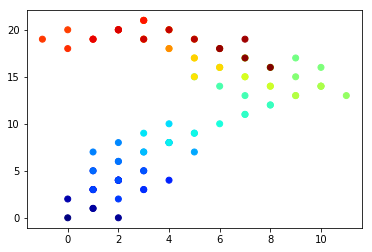

In [49]:
import random
import matplotlib.pyplot as plt
position = (0,0)
walk = [position]
steps = 100
for i in range(steps):
    x_step = 1 if random.randint(0,1) else -1
    y_step = 1 if random.randint(0,1) else -1
    position = (position[0] + x_step,
                position[1] + y_step)
    walk.append(position)
colors = np.arange(101)
plt.scatter(*zip(*walk), c = colors, cmap='jet')

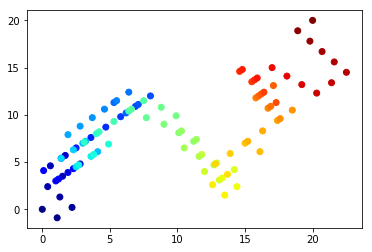

In [55]:
position = (0,0)
walk = [position]
steps = 100
for i in range(steps):
    x_step = 1 if random.randint(0,1) else -1
    y_step = 1 if random.randint(0,1) else -1
    position = (position[0] + x_step + .1,
                position[1] + y_step + .1)
    walk.append(position)
colors = np.arange(101)
plt.scatter(*zip(*walk), c = colors, cmap='jet')